In [6]:
import numpy as np
from conf import paths
import matplotlib.pyplot as plt

import os

In [4]:
curve = np.load(os.path.join(paths.EXPERIMENTS_PATH, 'exp_1', 'results', 'curve_1_7.npy'))

In [5]:
curve

array([[1.        , 0.01917204, 0.01917204],
       [0.9601038 , 0.302586  , 0.95683747],
       [0.94367313, 0.35075448, 0.96555213],
       [0.93241741, 0.38357946, 0.9701316 ],
       [0.91839831, 0.40949903, 0.97318822],
       [0.90956743, 0.43107265, 0.97542809],
       [0.89707385, 0.45074536, 0.97723362],
       [0.88926804, 0.46781234, 0.97869134],
       [0.87847566, 0.48358794, 0.97985463],
       [0.87161122, 0.49731641, 0.98084636],
       [0.86184932, 0.51048257, 0.98169818],
       [0.85593   , 0.52272539, 0.98248147],
       [0.84718905, 0.53464247, 0.98313326],
       [0.84169928, 0.54594685, 0.98376156],
       [0.83336153, 0.55567543, 0.984225  ],
       [0.82804948, 0.56549978, 0.98471423],
       [0.81984801, 0.57449497, 0.98509809],
       [0.81457113, 0.58433611, 0.98554976],
       [0.80703108, 0.59264885, 0.98583854],
       [0.80193585, 0.60289342, 0.98626344],
       [0.79455047, 0.61192656, 0.9865602 ],
       [0.78938607, 0.62110923, 0.98689946],
       [0.

In [13]:
def complete_nan_values(curve):
    vec_prec = curve[:,0]
    for j in reversed(range(len(vec_prec))):
        if np.isnan(vec_prec[j]):
            vec_prec[j] = vec_prec[j+1]

    vec_rec = curve[:,1]
    for j in (range(len(vec_rec))):
        if np.isnan(vec_rec[j]):
            vec_rec[j] = vec_rec[j-1]
    curve[:,1] = vec_rec
    return curve 

In [14]:
complete_nan_values(curve)

array([[1.        , 0.01917204, 0.01917204],
       [0.9601038 , 0.302586  , 0.95683747],
       [0.94367313, 0.35075448, 0.96555213],
       [0.93241741, 0.38357946, 0.9701316 ],
       [0.91839831, 0.40949903, 0.97318822],
       [0.90956743, 0.43107265, 0.97542809],
       [0.89707385, 0.45074536, 0.97723362],
       [0.88926804, 0.46781234, 0.97869134],
       [0.87847566, 0.48358794, 0.97985463],
       [0.87161122, 0.49731641, 0.98084636],
       [0.86184932, 0.51048257, 0.98169818],
       [0.85593   , 0.52272539, 0.98248147],
       [0.84718905, 0.53464247, 0.98313326],
       [0.84169928, 0.54594685, 0.98376156],
       [0.83336153, 0.55567543, 0.984225  ],
       [0.82804948, 0.56549978, 0.98471423],
       [0.81984801, 0.57449497, 0.98509809],
       [0.81457113, 0.58433611, 0.98554976],
       [0.80703108, 0.59264885, 0.98583854],
       [0.80193585, 0.60289342, 0.98626344],
       [0.79455047, 0.61192656, 0.9865602 ],
       [0.78938607, 0.62110923, 0.98689946],
       [0.

In [11]:
curve[-1, 1] = np.nan

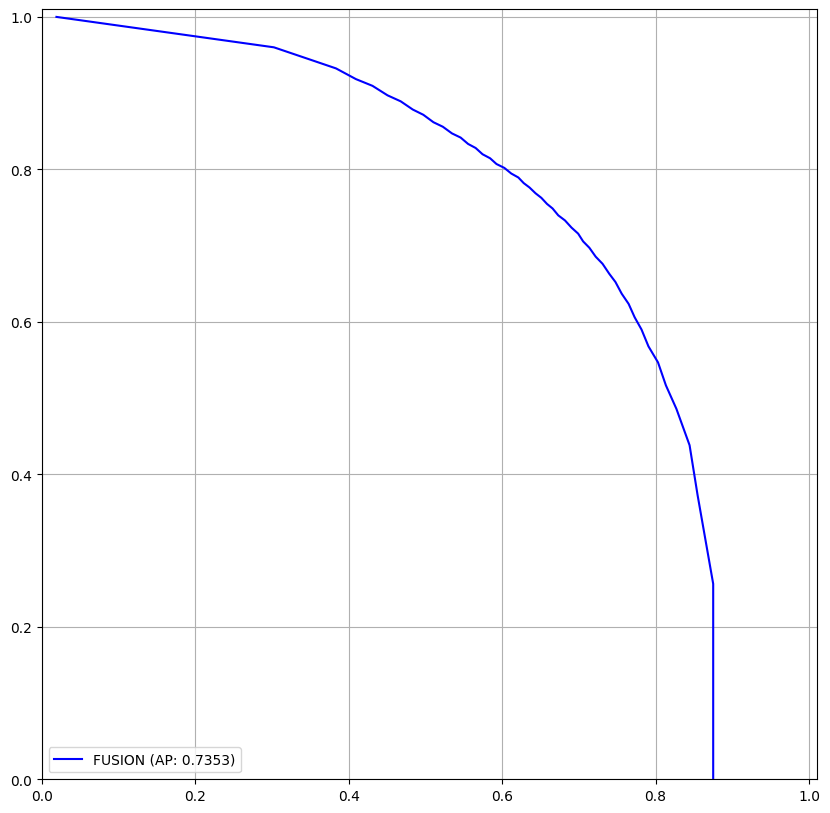

In [15]:
prec = curve[:,0]
recall = curve[:,1]

recall_ = np.insert(recall, 0, 0)
prec_ = np.insert(prec, 0, prec[0])
deltaR = recall_[1:]-recall_[:-1]
m_prec_ = (prec_[1:] + prec_[:-1])/2
AP = np.sum(m_prec_*deltaR)

plt.figure(figsize=(10,10))
plt.plot(curve[:,1],curve[:,0], 'b-', label = f'FUSION (AP: {AP:.4f})')
plt.legend(loc="lower left")
ax = plt.gca()
ax.set_ylim([0,1.01])
ax.set_xlim([0,1.01])
plt.grid()
plt.savefig(os.path.join(paths.EXPERIMENTS_PATH, 'exp_1', 'results', f'result_{1}_{7}_.png'))

In [16]:
AP

0.735253627732964